# Post process and make plots

In [1]:
# Load the amrwind-frontend module
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['../',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Important header information                                                                                                                                               
import postprolib as pp
# Load the libraries                                                                                                                                                         
import postproamrwindsample as ppsample
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr

# Make all plots inline 
%matplotlib inline

In [2]:
extractvar = lambda xrds, var, i : xrds[var][i,:].data.reshape(tuple(xrds.attrs['ijk_dims'][::-1]))

def setfigtextsize(ax, fsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.yaxis.get_offset_text()] + ax.get_xticklabels() + ax.get_yticklabels() ):
        item.set_fontsize(fsize)

In [3]:
rundir='/gpfs/alpine/cfd162/scratch/lcheung/AWAKEN/testturbs/post_processing'
#ncfile='TR_z090hh_64500.nc'
#ncfile='AF_z080hh_64500.nc'
#ncfile='CV_z080hh_64500.nc'
#ncfile='BR_z080hh_64500.nc'
ncfile='KP_z090hh_64500.nc'

In [4]:
figsize=(8,4)
itime=1000
nclist =[
    {'ncfile':'KP_z090hh_64500.nc', 'title':'King Plains z=90m',     'figsize':figsize},
    {'ncfile':'AF_z080hh_64500.nc', 'title':'Armadillo flats z=80m', 'figsize':figsize},
    {'ncfile':'TR_z090hh_64500.nc', 'title':'Thunder Ranch z=90m',   'figsize':figsize},
    {'ncfile':'CV_z080hh_64500.nc', 'title':'Chisholm View z=80m',   'figsize':figsize},
    {'ncfile':'BR_z080hh_64500.nc', 'title':'Breckenridge z=80m',    'figsize':figsize},
]

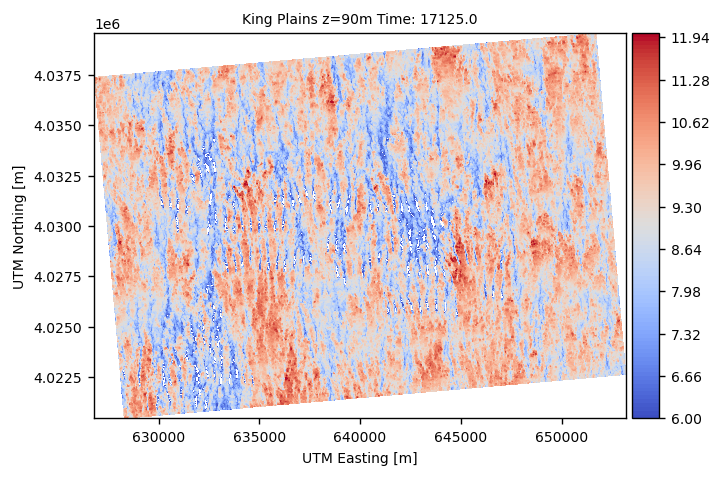

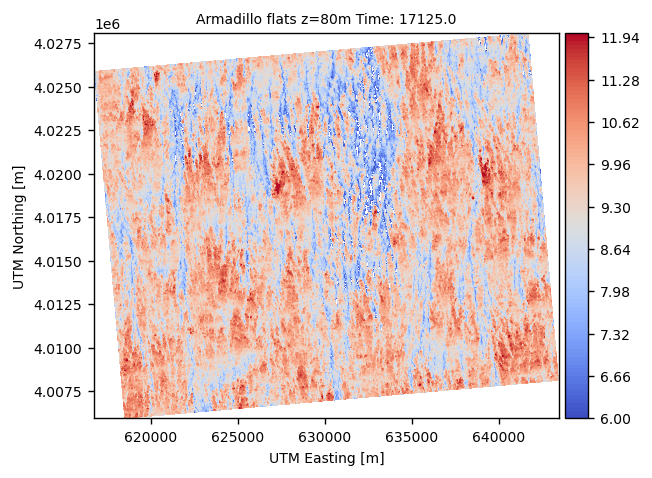

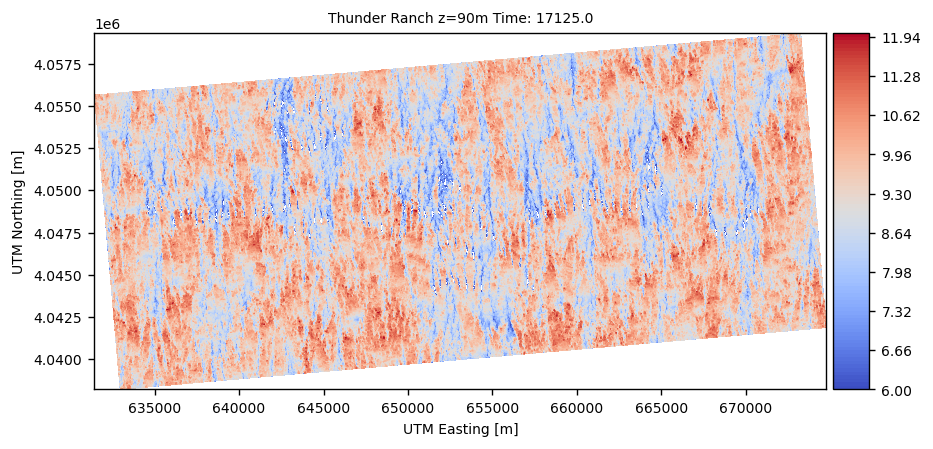

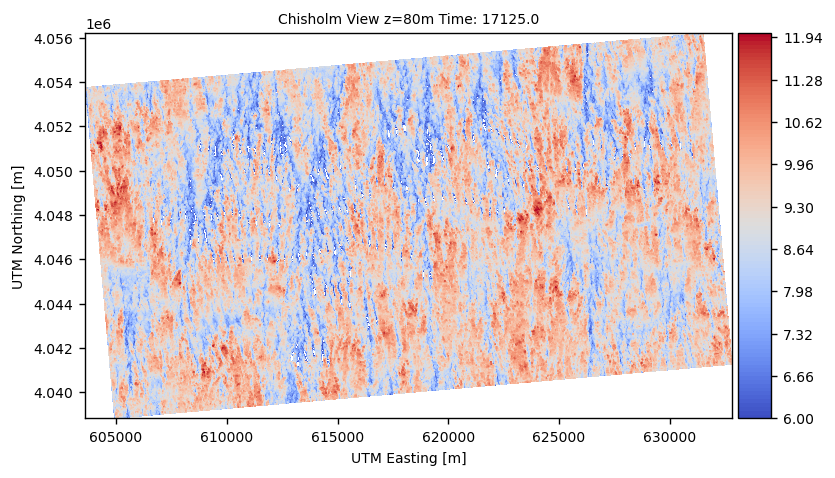

In [ ]:
# Make each plot
for nc in nclist:
    groups=ppsample.getGroups(ppsample.loadDataset(rundir+'/'+nc['ncfile']))
    with xr.open_dataset(rundir+'/'+nc['ncfile'], group=groups[0]) as ds:
        xm = ds['coordinates'].data[:,0].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
        ym = ds['coordinates'].data[:,1].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
        dtime=xr.open_dataset(rundir+'/'+ncfile)
        ds = ds.assign_coords(coords={'xm':(['x','y'], xm),
                                      'ym':(['x','y'], ym),
                                      'time':dtime['time'],
                                     })
        dtime.close()
        
        # Create a figure
        fig, ax = plt.subplots(1,1,figsize=nc['figsize'], dpi=125)
        vy = extractvar(ds, 'velocityy', itime)
        vx = extractvar(ds, 'velocityx', itime)
        vh = np.sqrt(vx**2 + vy**2)
        
        c=ax.contourf(ds['xm'], ds['ym'], vh[0,:,:], levels=np.linspace(6,12,101), cmap='coolwarm')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar=fig.colorbar(c, ax=ax, cax=cax)
        cbar.ax.tick_params(labelsize=8)
        ax.set_aspect('equal')
        #ax.set_xlim([630000, 670000])
        setfigtextsize(ax, 8)        
        ax.get_ylim()
        ax.set_title(nc['title']+' Time: %0.1f'%ds['time'][itime], fontsize =8)
        ax.set_xlabel('UTM Easting [m]')
        ax.set_ylabel('UTM Northing [m]')

```python
# Get a list of groups in the data file
groups=ppsample.getGroups(ppsample.loadDataset(rundir+'/'+ncfile))
ds = xr.open_dataset(rundir+'/'+ncfile, group=groups[0])
xm = ds['coordinates'].data[:,0].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))
ym = ds['coordinates'].data[:,1].reshape(tuple(ds.attrs['ijk_dims'][1::-1]))

dtime=xr.open_dataset(rundir+'/'+ncfile)
ds = ds.assign_coords(coords={'xm':(['x','y'], xm),
                              'ym':(['x','y'], ym),
                              'time':dtime['time'],
                        })
dtime.close()

vy = extractvar(ds, 'velocity_meany', 1000)
vx = extractvar(ds, 'velocity_meanx', 1000)
vh = np.sqrt(vx**2 + vy**2)
fig, ax = plt.subplots(1,1,figsize=(8,4), dpi=125)
c=ax.contourf(ds['xm'], ds['ym'], vh[0,:,:], levels=np.linspace(6,12,101), cmap='coolwarm')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=fig.colorbar(c, ax=ax, cax=cax)
ax.set_aspect('equal')
#ax.set_xlim([630000, 670000])
ax.get_ylim()

#fig.colorbar(c)
```

```python
dtime
tuple(ds.attrs['ijk_dims'][::-1])
tuple(ds.attrs['ijk_dims'][1::-1])
ds['time']
```